# Recursive multi-step forecasting with exogenous variables


In [19]:
import pandas as pd
import functions


import pandas as pd
import warnings
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg

from sklearn.linear_model import Ridge, Lasso

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Most Restricted Forecasting for start of COVID-19 pandemic 

## with Exoginous Variables 


 Forecast for most_restricted and depression untill 2021-01-01 

Test error (mse): 28.13149827875157 



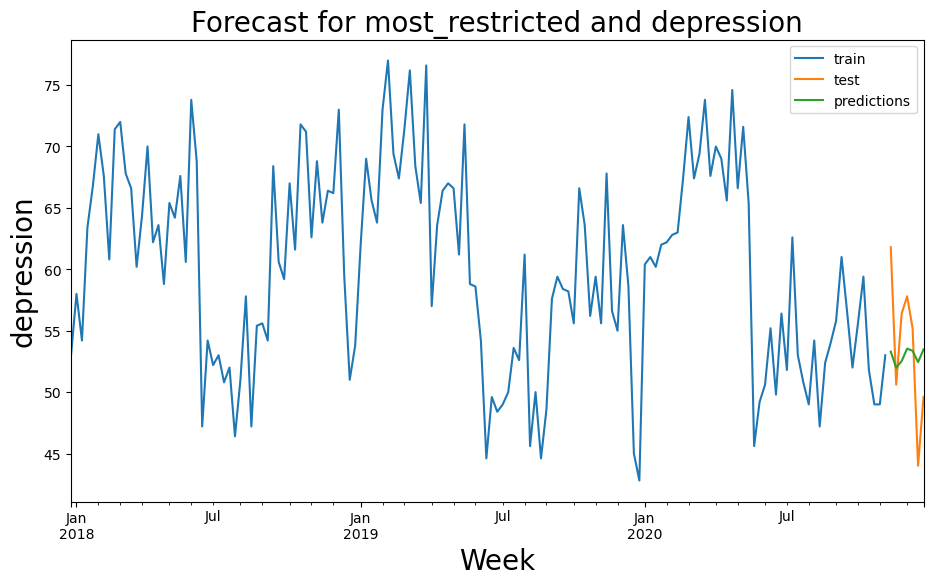


 Forecast for most_restricted and anxiety untill 2021-01-01 

Test error (mse): 25.1837627273116 



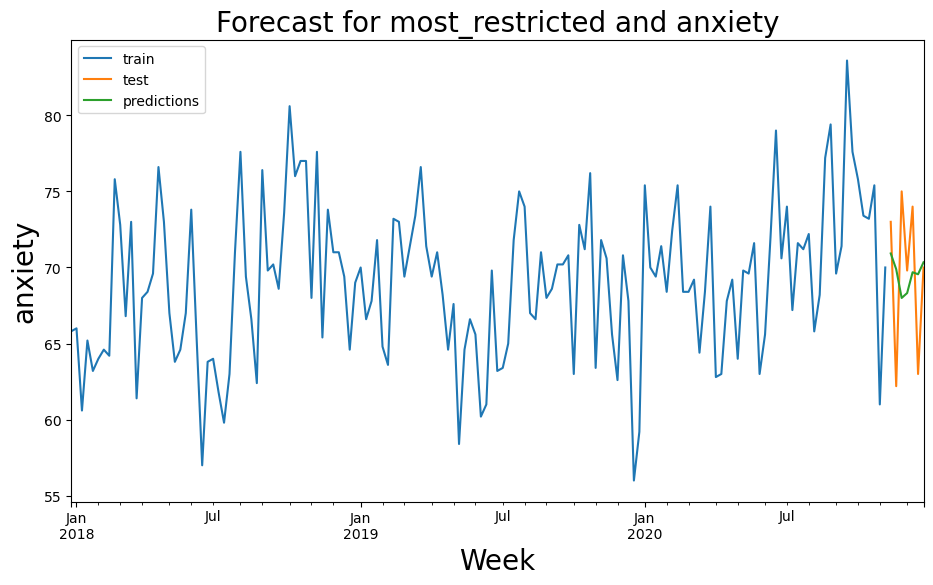


 Forecast for most_restricted and addiction untill 2021-01-01 

Test error (mse): 17.67704635454958 



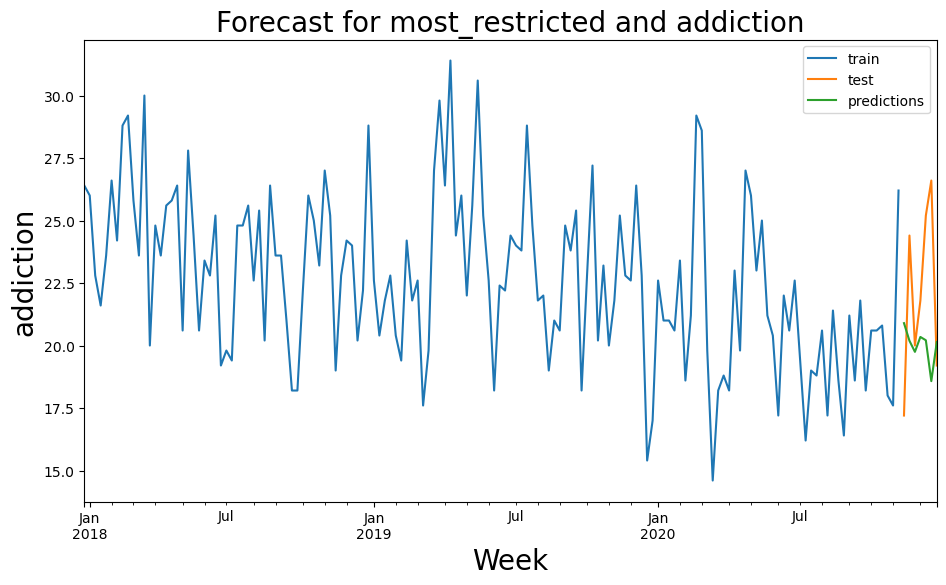


 Forecast for most_restricted and counselling untill 2021-01-01 

Test error (mse): 57.456144796515225 



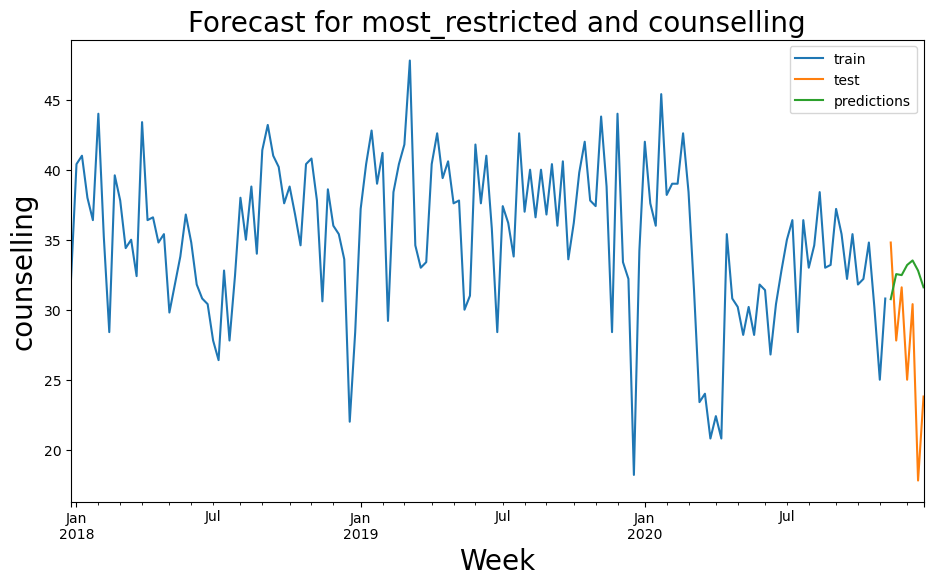


 Forecast for most_restricted and mental_health untill 2021-01-01 

Test error (mse): 76.30292604909816 



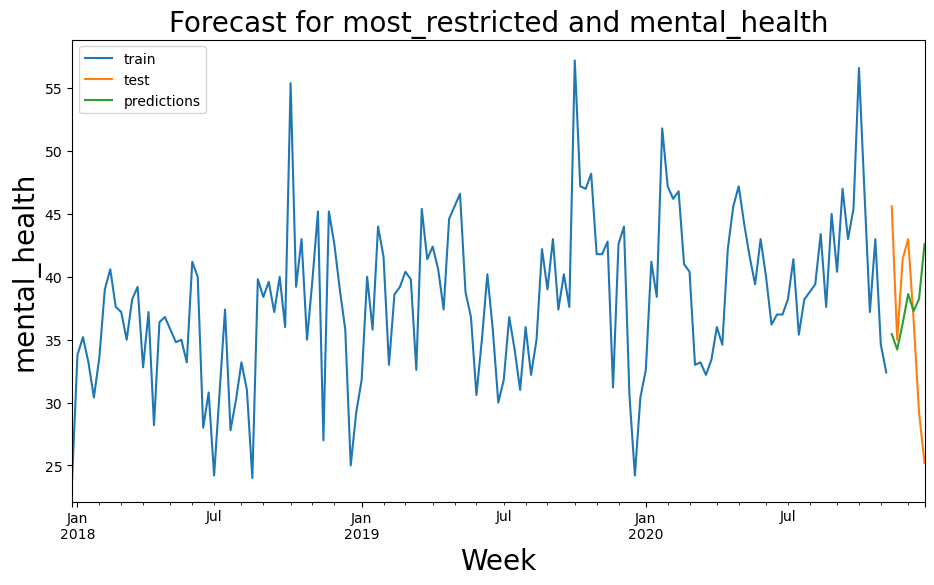

In [20]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
feature_imp_most = pd.DataFrame()
for search in searches_list:
        forecast = functions.forecast_file_search(file='most_restricted', period='2021-01-01', steps=7, search=search, regressor=Ridge(), lags=15)
        plt.show()
        if feature_imp_most.empty:
            feature_imp_most = forecast.get_feature_importance()
            feature_imp_most.rename(columns={'importance': search}, inplace=True)
        else:
            feature_imp_most = feature_imp_most.merge(forecast.get_feature_importance(), on = 'feature', how='left')
            feature_imp_most.rename(columns={'importance': search}, inplace=True)

In [21]:
# Get feature importanses only fot COVID-19 restrictions
feature_imp_most = feature_imp_most.loc[15:19]

## without Exoginous Variables 

In [22]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
for search in searches_list:
        functions.forecast_file_search_without_exogin(file='most_restricted', period='2021-01-01', steps=7, search=search, regressor=Ridge(), lags=15)
        plt.show()


 Forecast for most_restricted and depression untill 2021-01-01 

Test error (mse): 42.48134606112615 


 Forecast for most_restricted and anxiety untill 2021-01-01 

Test error (mse): 29.66992230104415 


 Forecast for most_restricted and addiction untill 2021-01-01 

Test error (mse): 14.217441104718798 


 Forecast for most_restricted and counselling untill 2021-01-01 

Test error (mse): 67.65176215015767 


 Forecast for most_restricted and mental_health untill 2021-01-01 

Test error (mse): 71.1470170654044 



# Least Restricted Forecastingfor start of COVID-19 pandemic 

##  with Exoginous Variables 


 Forecast for least_restricted and depression untill 2021-01-01 

Test error (mse): 92.41777500292798 



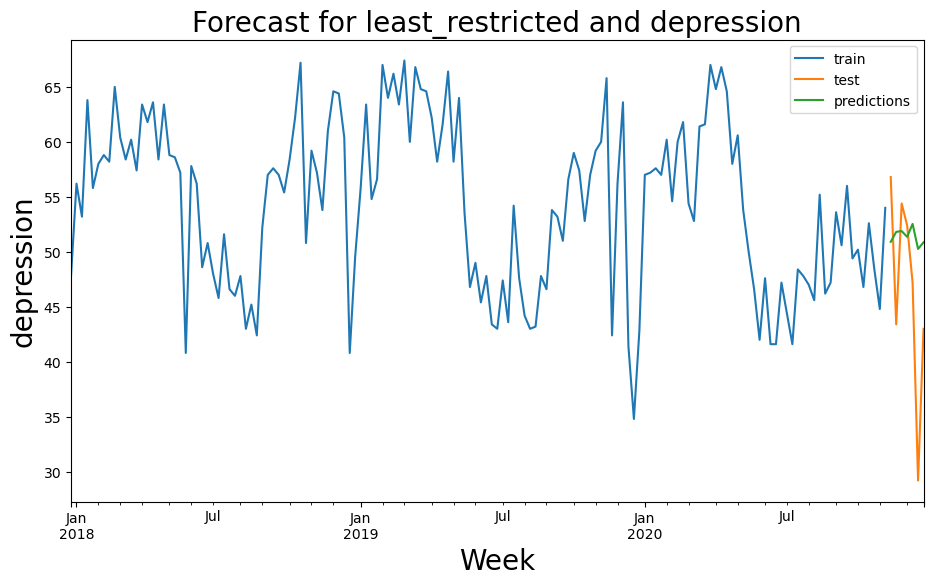


 Forecast for least_restricted and anxiety untill 2021-01-01 

Test error (mse): 32.205456507827556 



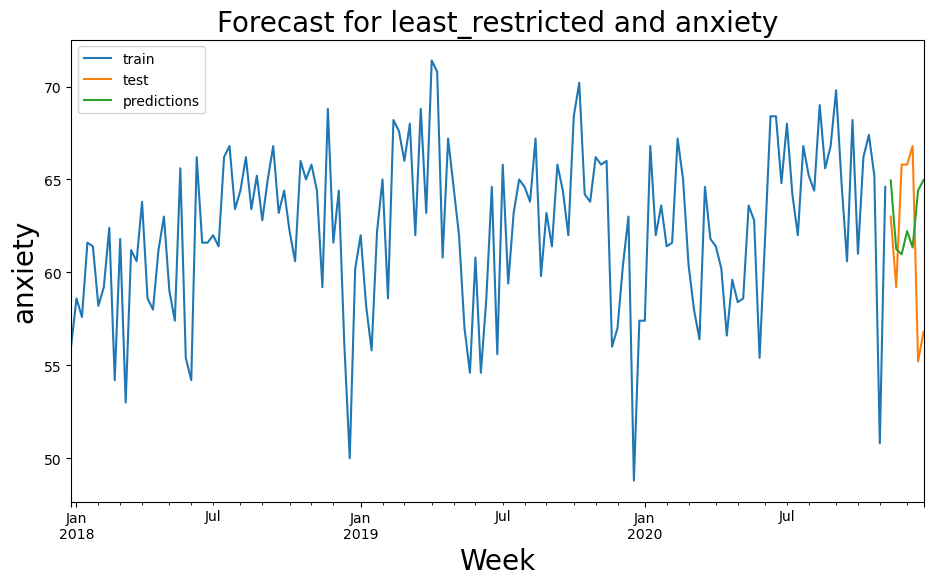


 Forecast for least_restricted and addiction untill 2021-01-01 

Test error (mse): 6.714394328565627 



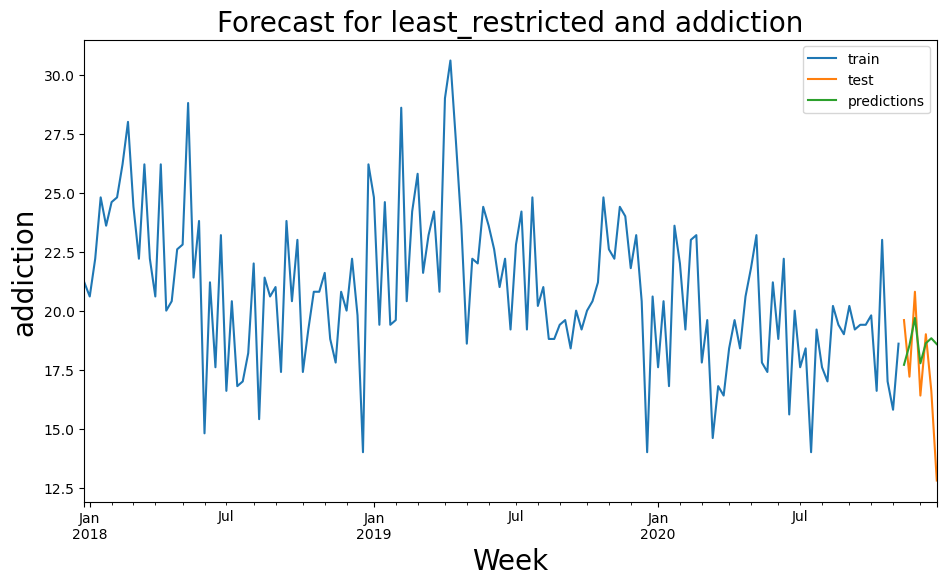


 Forecast for least_restricted and counselling untill 2021-01-01 

Test error (mse): 86.50212308831492 



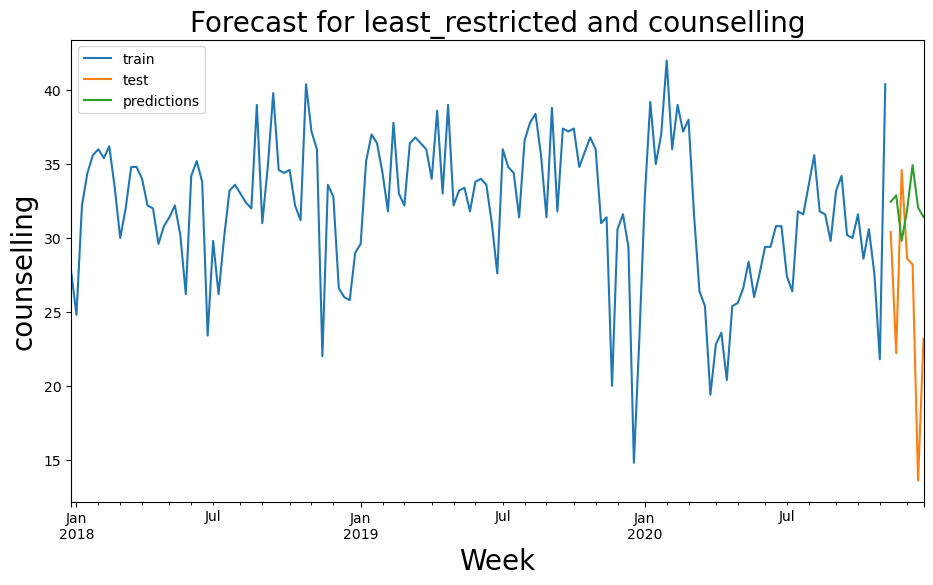


 Forecast for least_restricted and mental_health untill 2021-01-01 

Test error (mse): 47.00900658098733 



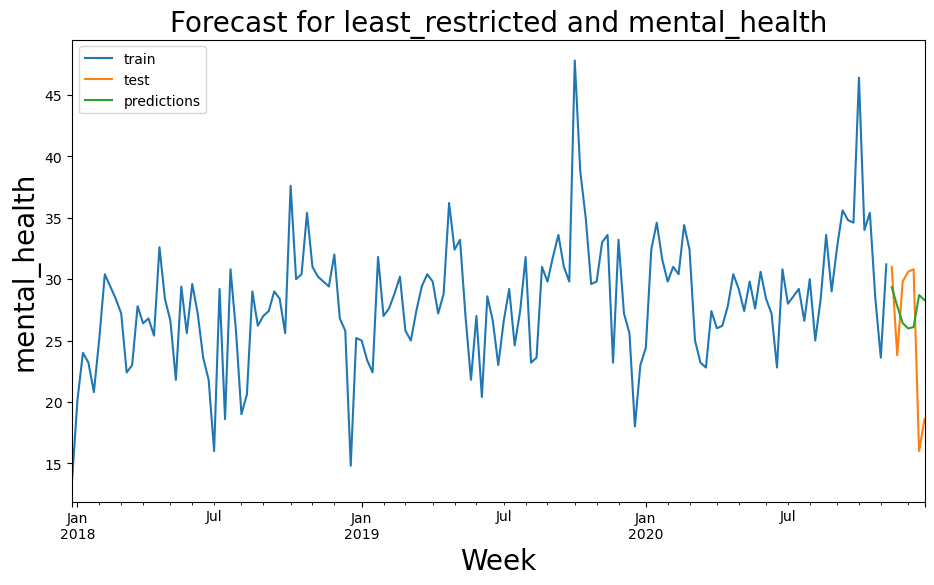

In [23]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
feature_imp_least = pd.DataFrame()
for search in searches_list:
        forecast = functions.forecast_file_search(file='least_restricted', period='2021-01-01', steps=7, search=search, regressor=Ridge(), lags=15)
        plt.show()
        if feature_imp_least.empty:
            feature_imp_least = forecast.get_feature_importance()
            feature_imp_least.rename(columns={'importance': search}, inplace=True)
        else:
            feature_imp_least = feature_imp_least.merge(forecast.get_feature_importance(), on = 'feature', how='left')
            feature_imp_least.rename(columns={'importance': search}, inplace=True)

In [24]:
# Get feature importanses only fot COVID-19 restrictions
feature_imp_least = feature_imp_least.iloc[15:]

## without Exoginous Variables 

In [25]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
for search in searches_list:
        functions.forecast_file_search_without_exogin(file='least_restricted', period='2021-01-01', steps=7, search=search, regressor=Ridge(), lags=15)
        plt.show()


 Forecast for least_restricted and depression untill 2021-01-01 

Test error (mse): 141.25504856441927 


 Forecast for least_restricted and anxiety untill 2021-01-01 

Test error (mse): 28.72158340227088 


 Forecast for least_restricted and addiction untill 2021-01-01 

Test error (mse): 8.873651039013257 


 Forecast for least_restricted and counselling untill 2021-01-01 

Test error (mse): 109.41928779746145 


 Forecast for least_restricted and mental_health untill 2021-01-01 

Test error (mse): 43.78564529503132 



## Covid-19 Restrictions importances for forecasting 

In [26]:
feature_imp_all = feature_imp_most.merge(feature_imp_least, on = 'feature', how='left', suffixes=['_most','_least'])

In [27]:
feature_imp_all.head()

,feature,depression_most,anxiety_most,addiction_most,counselling_most,mental_health_most,depression_least,anxiety_least,addiction_least,counselling_least,mental_health_least
0,stay_at_home,0.265771,-1.447619,0.800116,-1.735489,0.445638,2.289493,-2.112062,0.657421,-0.554495,0.822528
1,mask_mandate,-2.902515,2.100783,-0.678670,2.249770,1.260906,-3.233307,2.707789,-1.340663,0.626111,2.437018
2,gatherings_banned,0.410852,-0.197844,-0.429101,-2.690864,0.420639,-0.897321,1.084915,-0.854495,-3.195805,-0.224129
3,business_closures,0.410852,-0.197844,-0.429101,-2.690864,0.420639,-2.281510,0.419381,-0.155312,-0.987178,-0.249263
4,travel_restrictions,-0.530348,1.248872,-1.542117,-1.421050,0.422055,1.203252,-1.920496,0.713330,-0.851182,1.122429
